# Assignment 1 - LDSA


## Part I: Intro to HDFS/Hadoop and Wordcount

### Task 1.1

1. **Question** - *Look at the contents of the folder “output” - what are the files placed in there? What do they mean?*  
**Answer** - The files created in the output folder are “part-r-00000” and “_SUCCESS”. The first file contains the result of the word count performed on the input file used, and the other file is an empty file that simply specifies that the run of the word count application was successful.

2. **Question** - *In this example we used Hadoop in “Local (Standalone) Mode”. What is the difference between this mode and the Pseudo-distributed mode?*   
**Answer** - The local (standalone) mode is the default for Hadoop and it runs in a non-distributed mode, which means that it runs as a single java process. The pseudo-distributed mode means that each Hadoop daemon runs in a separate Java process.

### Task 1.2

1. **Question** - *What are the roles of the files core-site.xml and hdfs-site.xml?*  
**Answer** - The core-site.xml file stores the specific configuration settings for the Hadoop Core, such as where the I/O settings for NameNodes host and port. The hdfs-site.xml file contains the configuration settings for HDFS daemons; the NameNode, the Secondary NameNode, and the DataNodes. 

2. **Question** - *Describe briefly the roles of the different services listed when executing ‘jps’.*  
**Answer** - The NameNode is the master node of the hadoop cluster and is considered the primary node for the hdfs cluster with the purpose of storing the metadata information. The DataNodes are the slave nodes of the hdfs cluster, and the work performed by each one of these datanodes is based on the instructions in the namenode. The datanodes are used to store, retrieve and process data, and report back to the namenode periodically. The SecondaryNameNode is used to merge the FSImage and editlog periodically to prevent the edit log from becoming very large

### Task 1.3

1. **Question** - *Explain the roles of the different classes in the file WordCount.java.*   
**Answer** - First the constructor for the class is created by the line “public class WordCount {“. WordCount then has three nested classes, the Driver class (“public void static main”), the Map class (“public static class Map extends MapReduceBase implements Mapper<LongWritable, Text, Text, IntWritable>”),  and the Reduce class (“public static class Reduce extends MapReduceBase implements Reducer<Text, IntWritable, Text, IntWritable>”). The Driver class sets up the configuration of the input and output data formats, specifies the types of intermediate data produced etc. The Driver then submits the job to the Hadoop cluster to be executed there. The Map class performs the Mapping function, taking a set of data as input and converts it into another data type known as <Key, Value> pairs. The Reducer class performs the Reduce function, which takes the output of the Map function as the input and combines the values with the same key. 

### Task 1.4 

1. **Question** - *Describe the role of Combiners in MapReduce and Modify the code from Task1 so that it uses a Combiner.*  
**Answer** - The Combiners in MapReduce are used to perform a local reduce on the output on one mapper before the output is sent to the reducer stage. This reduces the memory/disk requirement of the map tasks and thus minimizing the volume of data transfer between between map and reduce tasks.


In [16]:
%matplotlib inline

       1
0       
a  10170
b   4860
c   4298
d   2743
e   3491
f   4130
g   1770
h   3106
i   8685
j    344
k    465
l   2689
m   4819
n   2062
o   9720
p   3880
q    173
r   2504
s   7411
t  18600
u   1110
v    935
w   5886
x     32
y    479
z     55


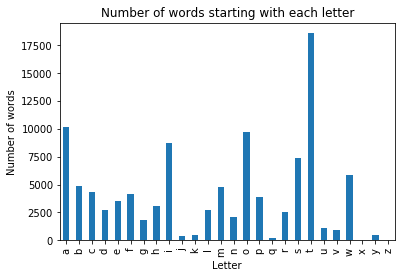

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnds

#### This script reads the reads the results from the mapreduce letter count using 
#### the pandas read_table() function. It then plots these results in a bar chart 
#### to visualize the number of words in the data that start with each letter. 
#### The mapreduce was performed using the LetterCount.java script.

# read results from the mapreduce "part-00000" file as a pandas table 
lettercount = pnds.read_table('part-00000', header=None, index_col=0)
print(lettercount)
# plot results as a bar-plot
plot = lettercount.plot(title='Number of words starting with each letter' \
                        , kind='bar', legend=None)
# set axes-labeles
plot.set_xlabel("Letter")
plot.set_ylabel("Number of words")
# save the plot as an image
plt.savefig('lettercount.png')
plt.show()

## Part II: Analyzing twitter data using Hadoop streaming and Python

1. **Question** - *Based on the documentation in the above link, how would you classify the JSON-formatted tweets? Structured, semi-structured or unstructured data? What could be the challenges of using traditional row-based RDBMs to store and analyze this dataset (apart from the possibility of very large datasets)?*  
**Answer** - I would classify JSON-formatted tweets as semi-structured data, because they do have a fixed syntax and structure with many different data types which unstructured data does not have. However since JSON tweets are not easily implemented into traditional RDBMs they cannot be classified as structured data. Some challenges of using RDBMs for JSON datasets is that they use different types of structures for data storage. RDBMs use tables to store data in rows and columns, while JSON instead uses objects and arrays (which can be nested recursively). This means that the JSON data would have to be re-formated to fit into the RDBMs structure before it can be stored and analyzed in a relational database, since in RDBMS the retrieving and sorting of the data is based on the specific table structure in relational databases.

In [1]:
%matplotlib inline

              0
den    0.482372
han    0.271195
det    0.178413
hon    0.124053
hen    0.010937
denna  0.008985
denne  0.001577


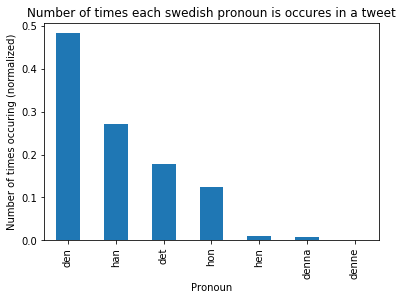

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnds
import csv

#### This script takes the results of the python word count for the twitter data and 
#### plots it as a bar chart. The results were calculated in two batches due to 
#### memory storage issues in hadoop, which is why the results had to be added 
#### together to a final dictionary in the first for-loop bellow. 
#### The results are opened and read as a csv-file named "twitter-results" 
#### and then added together into a python dictionary "wordcount".
#### The script also openes the "count_tweets.txt" file, which is the result of the 
#### counter.py script that calculates the number of unique tweets in the twitter-data. 
#### This number is then used to normalize the word count.
#### The wordcount dict is then converted to the pandas DataFrame-format,
#### which gives us the results in a table that can be easily plotted 
#### into a bar chart to visualize the occurences of each Swedish pronoun 
#### (normalized by the number of unique tweets). 

#### The Twitter word count was calculated using the mapper.py and reducer.py script 
#### along with the hadoop streaming API to perform a mapreduce on the data. 
#### The count_tweets.txt results were calculated using the counter.py script
#### and iterating through all the tweets-files. 

# open the "twitter-results" file
with open('twitter-results') as infile:
    # read the results as a tsv file 
    #(read as csv but with "\t" as delimiter instead of ",")
    reader = csv.reader(infile, delimiter='\t')
    # create empty dictionary
    wordcount = {}
    # open file containing the number of unique tweets, to be used to normalize 
    # the result from the word count
    count_file = open('count_tweets.txt')
    # read from the file and convert string to float-variable containing the number 
    # of unique tweets
    nr_of_unique_tweets = float(count_file.read())
    
    # iterate through the file to add the results from the separate runs 
    # together into one list
    for row in reader:
        # save the rows key and value (k and v)
        k, v = row
        # turn value from string to integer
        v = float(v)
        # Check if the key is already in our output dict
        if k in wordcount.keys():
            # if it is, add values
            wordcount[k] += v
        # If not, create it
        else:
            wordcount[k] = v
    # normalize the values by the total number of unique tweets
    for k in wordcount:
        wordcount[k] = wordcount[k]/nr_of_unique_tweets 
        
    # save dictionary as a pandas DataFrame        
    twitter_wordcount = pnds.DataFrame.from_dict(wordcount, 'index')
    # sort the DataFrame by values
    twitter_wordcount = twitter_wordcount.sort_values([0], ascending=False)
    print(twitter_wordcount)
    # plot result in bar-plot
    plot = twitter_wordcount.plot(title='Number of times each swedish pronoun is occures in a tweet' \
                                  , kind='bar', legend=None)
    plot.set_xlabel("Pronoun")
    plot.set_ylabel("Number of times occuring (normalized)")
    # save the bar chart as an image
    plt.savefig('twitter_wordcount.png')
    plt.show()